# Evapotranspiration Calculation

In this document we will see how to calculate crop water requirement in Python.

Library you might interesetd in:  [pyETO](http://pyeto.readthedocs.io/en/latest/overview.html)

## Evapotranspiration:
Evapotranspiration is the process which includes Evaporation & Transpiration. More specifically, the process by which water is transferred from the land to the atmosphere by evaporation from the soil and other surfaces and by transpiration from plants.

### Evaporation:
Evaporation is the process whereby liquid water is converted to water vapour (vaporization) and removed from the evaporating surface (vapour removal). Water evaporates from a variety of surfaces, such as lakes, rivers, pavements, soils and wet vegetation.

### Transpiration:
Transpiration consists of the vaporization of liquid water contained in plant tissues and the vapour removal to the atmosphere.


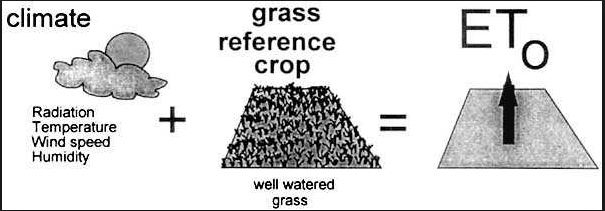

In [1]:
from IPython.display import Image
Image("ETR_process.png")

#### Theoretical background:

Penman-Monteith equation:
\begin{equation*}
ET_{Penman-Monteith} = \frac{\Delta (R_{n} - G) + \rho _{a}C_{p}\frac{(e_{s}-e_{a})}{r_{a}}}{\Delta + \gamma(1 + \frac{r_{s}}{r_{a}}) }
\end{equation*}

Reference:[FAO56](http://www.fao.org/docrep/X0490E/x0490e06.htm#fao penman monteith equation)

where Rn is the net radiation, G is the soil heat flux, (es - ea) represents the vapour pressure deficit of the air, r a is the mean air density at constant pressure, cp is the specific heat of the air, D represents the slope of the saturation vapour pressure temperature relationship, g is the psychrometric constant, and rs and ra are the (bulk) surface and aerodynamic resistances.

Hargreaves-Samani Equation:
\begin{equation*}
ET_{Hargreaves-Samani} = 0.0135(KT)(R_{a})(TD)^{1/2}(TC+17.8)
\end{equation*}

Reference: [Hargreaves-Samani Equation](http://www.zohrabsamani.com/research_material/files/Hargreaves-samani.pdf)

where, KT is an empirical coefficient, TD is the temperature difference, Ra is the extraterrestrial radiation (mm/day) calculated by Hargreaves-Samani method & TC is the average daily temperature. 

Thornthwaite equation:

This method is used for calculating potential evapotranspiration.
This equation only requires mean monthly air temperature and mean daily daylight hours for each month, which can be calculated from latitude.
\begin{equation*}
PET_{Thornthwaite} = 16(\frac{10(t)}{I})^{a} (\frac{N}{12})\frac{d}{30}
\end{equation*}


where, t is the air temperature, I is the annual heat index, N are the theoretical sunshine hours for each month and d is the number of days for each month. 

Reference: [Thornthwaite equation](https://upcommons.upc.edu/bitstream/handle/2117/89152/Appendix_10.pdf?sequence=3&isAllowed=y)

#### Import the required libraries

In [2]:
import pandas as pd

In [3]:
# load data into variable df
df = pd.read_csv('ETdata.csv')

In [4]:
df

,Date,t,PE,PanFactor
0,11/20/2019,1,4.328571,0.7
1,11/21/2019,2,4.457143,0.7
2,11/22/2019,3,4.800000,0.7
3,11/23/2019,4,3.971429,0.7
4,11/24/2019,5,4.800000,0.7
...,...,...,...,...
115,3/14/2020,116,4.728571,0.7
116,3/15/2020,117,5.114286,0.7
117,3/16/2020,118,4.828571,0.7
118,3/17/2020,119,5.200000,0.7


In [5]:
# Basic analysis
df.describe()

,t,PE,PanFactor
count,120.000000,120.000000,1.200000e+02
mean,60.500000,3.958333,7.000000e-01
std,34.785054,0.827989,1.560829e-15
min,1.000000,2.357143,7.000000e-01
25%,30.750000,3.350000,7.000000e-01
50%,60.500000,3.807143,7.000000e-01
75%,90.250000,4.489286,7.000000e-01
max,120.000000,6.271429,7.000000e-01


### Reference crop evapotranspiration (ETr):

#### Formula: 
ETr (mm) = pan factor*PE              
(pan factor = 0.7 (fixed for 120 days))

In [6]:
df['ETr'] = df['PE']*df['PanFactor']
df.head(3)

,Date,t,PE,PanFactor,ETr
0,11/20/2019,1,4.328571,0.7,3.03
1,11/21/2019,2,4.457143,0.7,3.12
2,11/22/2019,3,4.800000,0.7,3.36


#### Crop Coefficient:
We need to calculate daily kc (crop coefficient/crop factor) for crop period (120 days)


| Crop | Polynomial Equatiion | 
| --- | --- | 
| Wheat | Kc = 10.090(t/T)5 -20.0390(t/T)4+12.8710(t/T)3-7.0936(t/T)2+3.7412(t/T)  +0.5942 | 

Where,

T	=	total crop period (days) 


t	=	days since sowing or planting


In [7]:
T = len(df)

In [8]:
def cal_kc(t , T=120):
    temp = t/T
    kc= 10.090*pow(temp , 5) -20.0390*pow(temp,4)+12.8710*pow(temp,3)-7.0936*pow(temp ,2)+3.7412*temp +0.5942
    return kc

In [9]:
df['kc'] = df['t'].apply(cal_kc)

In [10]:
df

,Date,t,PE,PanFactor,ETr,kc
0,11/20/2019,1,4.328571,0.7,3.03,0.624891
1,11/21/2019,2,4.457143,0.7,3.12,0.654641
2,11/22/2019,3,4.800000,0.7,3.36,0.683490
3,11/23/2019,4,3.971429,0.7,2.78,0.711477
4,11/24/2019,5,4.800000,0.7,3.36,0.738640
...,...,...,...,...,...,...
115,3/14/2020,116,4.728571,0.7,3.31,0.227431
116,3/15/2020,117,5.114286,0.7,3.58,0.209377
117,3/16/2020,118,4.828571,0.7,3.38,0.192682
118,3/17/2020,119,5.200000,0.7,3.64,0.177452


### Crop Evapotranspiration(ETc):

ETc(mm) = = Kc * ETr

If we are using the surface irrigation method the efficiency = 60 % and area = 1 ha = 10000 m2

   * WR (mm) = ETc/0.6
   * WR (m3) = WR (mm)*10000 (m2)
   * Total WR (mm) for crop period (120 days) = sum of WR (mm) 120 records
   * Total WR (m3) for crop period (120 days) for 1 ha area = sum of WR (m3) 120 records


In [11]:
# Calculating ETc
df['ETc'] = df['ETr']*df['kc']
df.head(5)

,Date,t,PE,PanFactor,ETr,kc,ETc
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526
3,11/23/2019,4,3.971429,0.7,2.78,0.711477,1.977907
4,11/24/2019,5,4.800000,0.7,3.36,0.738640,2.481830


In [12]:
# Calculating Water Requirement in mm
df['WR(mm)'] = df['ETc']/0.6
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543


In [13]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [14]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [15]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [16]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [17]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [18]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [19]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [20]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [21]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [22]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [23]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433


In [24]:
# Calculating Water Requirement in cubic meter
df['WR(CuMeter)'] = df['WR(mm)'] * 10
df.head(3)

,Date,t,PE,PanFactor,ETr,kc,ETc,WR(mm),WR(CuMeter)
0,11/20/2019,1,4.328571,0.7,3.03,0.624891,1.893421,3.155702,31.557016
1,11/21/2019,2,4.457143,0.7,3.12,0.654641,2.042480,3.404133,34.041329
2,11/22/2019,3,4.800000,0.7,3.36,0.683490,2.296526,3.827543,38.275433
